**ABD Sosyal Güvenlik Kurumu SSA verilerinden 1880-2021 yılları arasında doğan bebeklerin isim analizleridir**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
names1880 = pd.read_csv("names-abd/yob1880.txt",names=["name", "sex", "births"])

In [8]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   sex     2000 non-null   object
 2   births  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [9]:
names1880.head(5)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [10]:
names1880.groupby('sex')['births'].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

Datasette yıllara göre txt dosyaları ayrı bunların hepsini dataframe yapısına year olarak ekleyeceğim.

In [12]:
part = []
for year in range(1880, 2022):
    path = f"names-abd/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    part.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(part, ignore_index=True)

In [13]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


1880-2021 yıllarında doğan bebeklerin cinsiyetleri. Daha çok erkek bebek olduğunu görebiliriz.

In [14]:
names.groupby('sex')['births'].sum()

sex
F    179027755
M    182860478
Name: births, dtype: int64

Şimdi yıllara göre toplam erkek-kız bebek sayılarını bulabileceğimiz pivot table oluşturacağız.

In [15]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


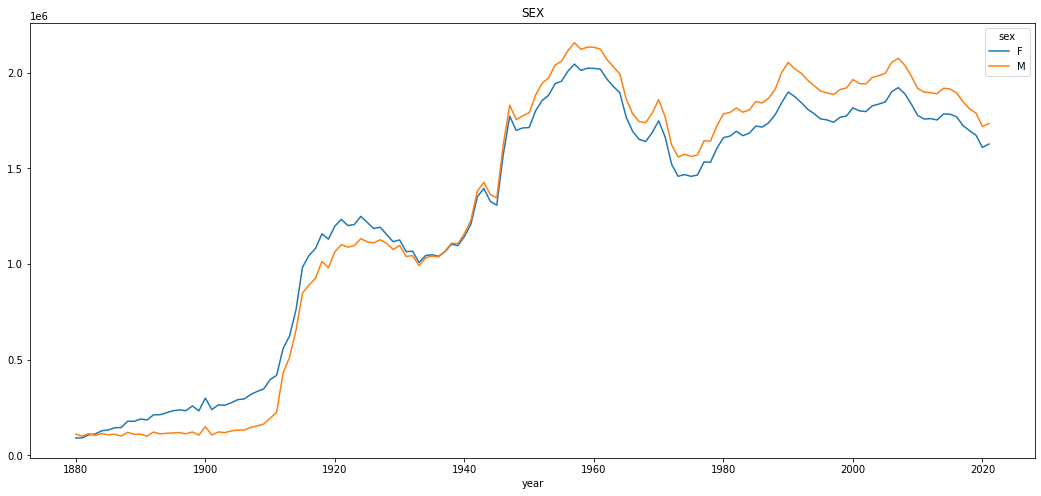

In [24]:
total_births.plot(title="SEX")
plt.gcf().set_size_inches(18, 8)
plt.show()

İsimler için belli bir oran bulacağız. Doğan bebek sayısı/ toplam 

In [25]:
def ratio(df):
    df['ratio'] = df['births'] / df['births'].sum()
    return df

In [29]:
names = names.groupby(['year', 'sex']).apply(ratio) #bu şekilde gruplamamın sebebi 1880deki erkek oranı ve 1880deki kız bebek oranını ayrı ayrı bulmak
names

,name,sex,births,year,ratio
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [30]:
names.groupby(['year', 'sex'])['ratio'].sum() 

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2019  M      1.0
2020  F      1.0
      M      1.0
2021  F      1.0
      M      1.0
Name: ratio, Length: 284, dtype: float64

Top 1000

In [62]:
def get_top1000(df):
    return df.sort_values('births',ascending=False)[:1000]#en yüksek 1000 doğum sayısı

In [63]:
grouped = names.groupby(['year','sex'])

top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year     ratio
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2021 M   2039783        Zev   M     218  2021  0.000126
         2039789     Harris   M     217  2021  0.000125
         2039793     Ronnie   M     217  2021  0.000125
         2039792    Merrick   M     217  2021  0.000125
         2039791     Mayson   M     217  2021  0.000125

[283876 rows x 5 columns]

In [64]:
top1000 = top1000.reset_index(drop=True) #index düzenlemesi
top1000

,name,sex,births,year,ratio
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


In [65]:
boys = top1000[top1000["sex"] == "M"]

girls = top1000[top1000["sex"] == "F"]

In [66]:
boys

,name,sex,births,year,ratio
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


In [67]:
girls

,name,sex,births,year,ratio
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
282871,Soleil,F,255,2021,0.000157
282872,Sandra,F,255,2021,0.000157
282873,Eleanora,F,255,2021,0.000157
282874,Aarya,F,255,2021,0.000157


In [68]:
total_births = top1000.pivot_table("births", index="year",columns='name',aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 1880 to 2021
Columns: 7276 entries, Aaden to Zyon
dtypes: float64(7276)
memory usage: 7.9 MB


In [69]:
subset = total_births[["John", "Harry", "Mary", "Marilyn","Zoe"]]
subset

name,John,Harry,Mary,Marilyn,Zoe
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,23.0
1881,8795.0,2002.0,6948.0,NaN,22.0
1882,9597.0,2246.0,8178.0,NaN,25.0
1883,8934.0,2116.0,8044.0,NaN,23.0
1884,9428.0,2338.0,9253.0,NaN,31.0
...,...,...,...,...,...
2017,9510.0,401.0,2416.0,584.0,5168.0
2018,9179.0,428.0,2355.0,497.0,5118.0
2019,8831.0,414.0,2226.0,462.0,5064.0


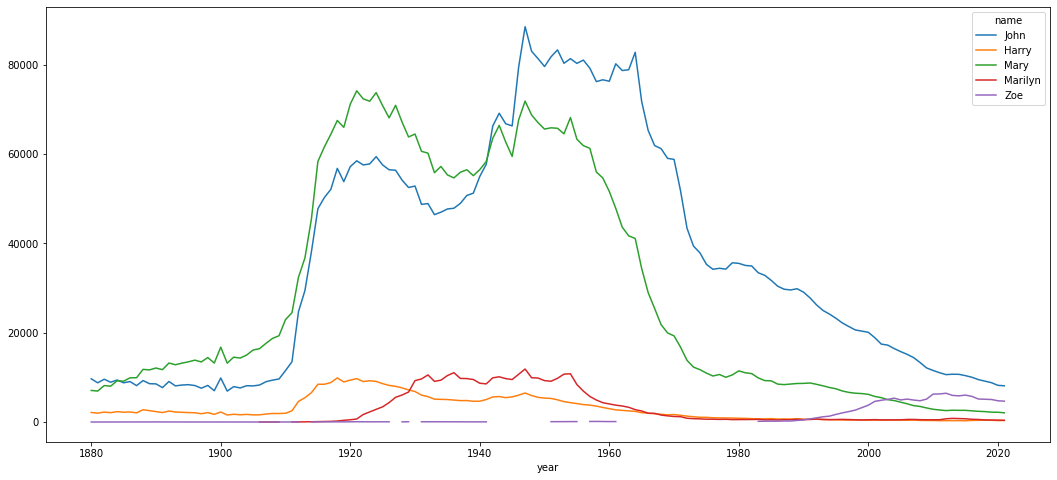

In [70]:
subset.plot()
plt.gcf().set_size_inches(18, 8)
plt.show()

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

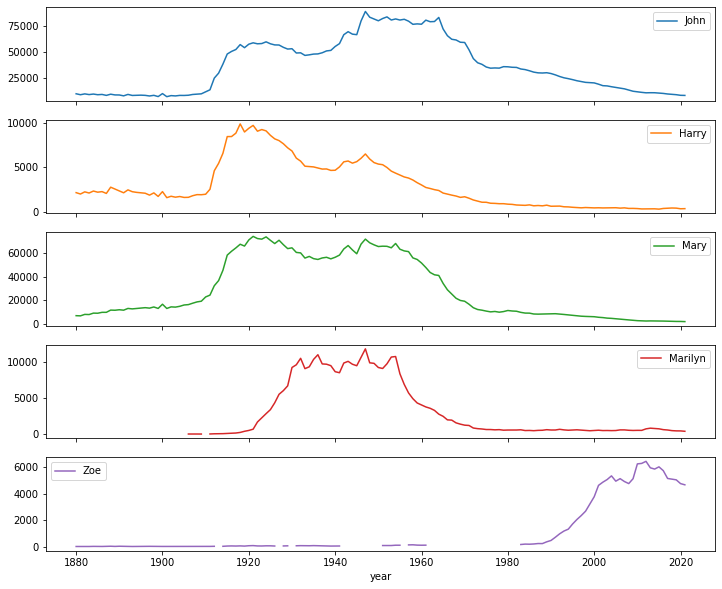

In [71]:
subset.plot(subplots=True, figsize=(12, 10)) #bu da farklı bir kullanım

Top 1000'deki cinsiyet oranını inceleyeceğiz

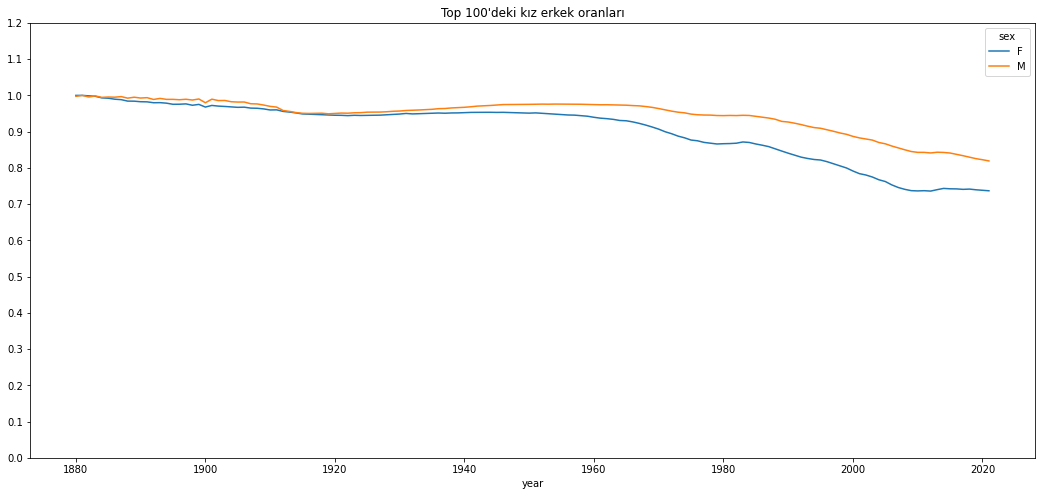

In [72]:
table = top1000.pivot_table('ratio',index='year',columns='sex',aggfunc=sum)
table.plot( title = "Top 100'deki kız erkek oranları",yticks=np.linspace(0, 1.2, 13))
plt.gcf().set_size_inches(18, 8)
plt.show()

Kız Erkek isimlerinin birbirlerine dönüşümleri

In [73]:
all_names = pd.Series(top1000["name"].unique())

lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [75]:
filtered = top1000[top1000["name"].isin(lesley_like)] #içinde leslye benzeyenleri filtreledik
filtered

,name,sex,births,year,ratio
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
274325,Leslie,F,703,2017,0.000408
276396,Leslie,F,600,2018,0.000354
278412,Leslie,F,571,2019,0.000341
280471,Leslie,F,486,2020,0.000302


In [78]:
filtered.groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: births, dtype: int64

In [79]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table #lesli olanları yıl ve doğum sayısına göre pivot table yapısı içine aldık

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2017,703.0,NaN
2018,600.0,NaN
2019,571.0,NaN


In [84]:
table = table.div(table.sum(axis="columns"), axis="index")
"""div şu demek :
    mesela 1881 yılı için --> F :11, M : 92
    divin ilk elementi datadır.axis ise index görevi görür.
    toplam 103 doğan var. 11'i kız yani 11/103 = 0.1 oranını verir
    aslında normalleştirme gibi. 92'si erkek yani 92/103 = 0.89 oranını verir

"""

"div şu demek :\n    mesela 1881 yılı için --> F :11, M : 92\n    divin ilk elementi datadır.axis ise index görevi görür.\n    toplam 103 doğan var. 11'i kız yani 11/103 = 0.1 oranını verir\n    aslında normalleştirme gibi. 92'si erkek yani 92/103 = 0.89 oranını verir\n\n"

In [85]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2017,1.000000,NaN
2018,1.000000,NaN
2019,1.000000,NaN


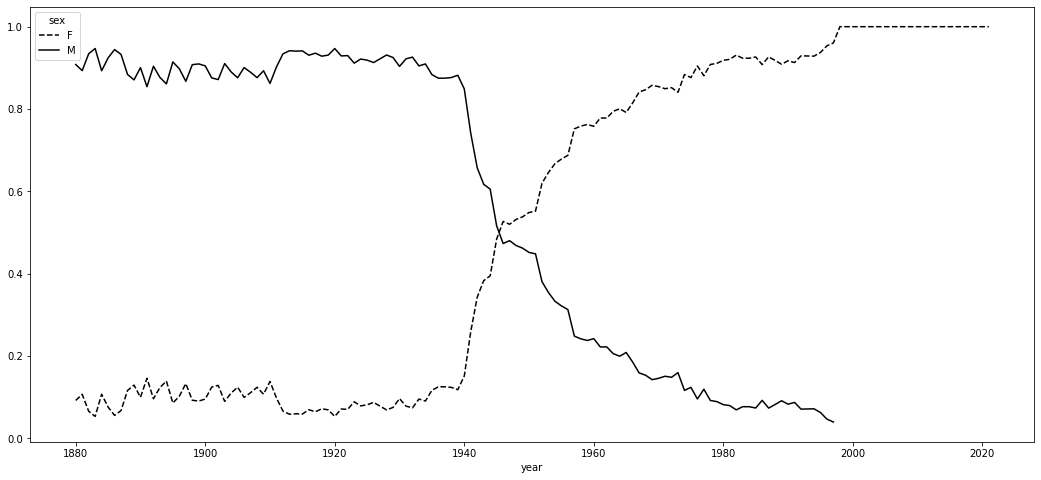

In [87]:
table.plot(style={"M": "k-", "F": "k--"})
plt.gcf().set_size_inches(18, 8)
plt.show()

Yani leslie ve türevleri 2000 yılından sonra daha çok kız bebeklerine verilmiş diyebiliriz